In [13]:
%matplotlib inline

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

In [81]:
N = 50  # number of lines
h = 0.01  # Time step

ts = np.arange(0, 100, h)  # Integration range

In [70]:
# Initial conditions
xs = np.linspace(0, 4*np.pi, N, endpoint=False)
k = 4*np.pi/N  # Spatial step

u0 = np.cos(xs)
p0 = np.sin(xs)

print(k)

0.25132741228718347


In [87]:
def H(u, p):
    return (p**2 + ((np.roll(u, 1) - u)/k)**2).sum()*k/2

H0 = H(u0, p0); H0

6.266683405277266

In [105]:
def euler_one_step(x, feedback=True):
    n = len(x)//2
    u, p = x[:n], x[n:]
    
    du = p
    dp = (np.roll(u, 1) - 2*u + np.roll(u, -1))/k**2
    
    if feedback:
        delta_H = H(u, p) - H0
        grad_V_u = delta_H*p*k
        grad_V_p = -delta_H*dp*k

        du -= grad_V_u
        dp -= grad_V_p
    
    return x + h*np.hstack((du, dp))

In [106]:
x0 = np.hstack((u0, p0))
data = [x0]
for _ in range(len(ts)):
    x0 = euler_one_step(x0)
    data.append(x0)

data = np.asarray(data)
us_feedback = data[:, :data.shape[1]//2]
ps_feedback = data[:, data.shape[1]//2:]

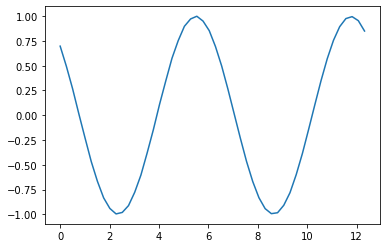

In [107]:
plt.plot(xs, us_feedback[-1])

In [108]:
x0 = np.hstack((u0, p0))
data = [x0]
for _ in range(len(ts)):
    x0 = euler_one_step(x0, feedback=False)
    data.append(x0)

data = np.asarray(data)
us_euler = data[:, :data.shape[1]//2]
ps_euler = data[:, data.shape[1]//2:]

In [121]:
energy_feedback = np.asarray([H(u, p) for (u, p) in zip(us_feedback, ps_feedback)])
energy_euler = np.asarray([H(u, p) for (u, p) in zip(us_euler, ps_euler)])

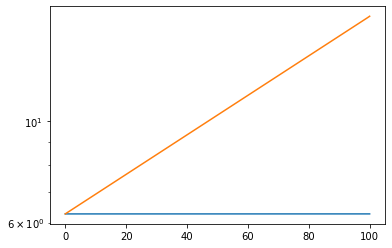

In [124]:
plt.semilogy(ts, energy_feedback[1:])
plt.semilogy(ts, energy_euler[1:])

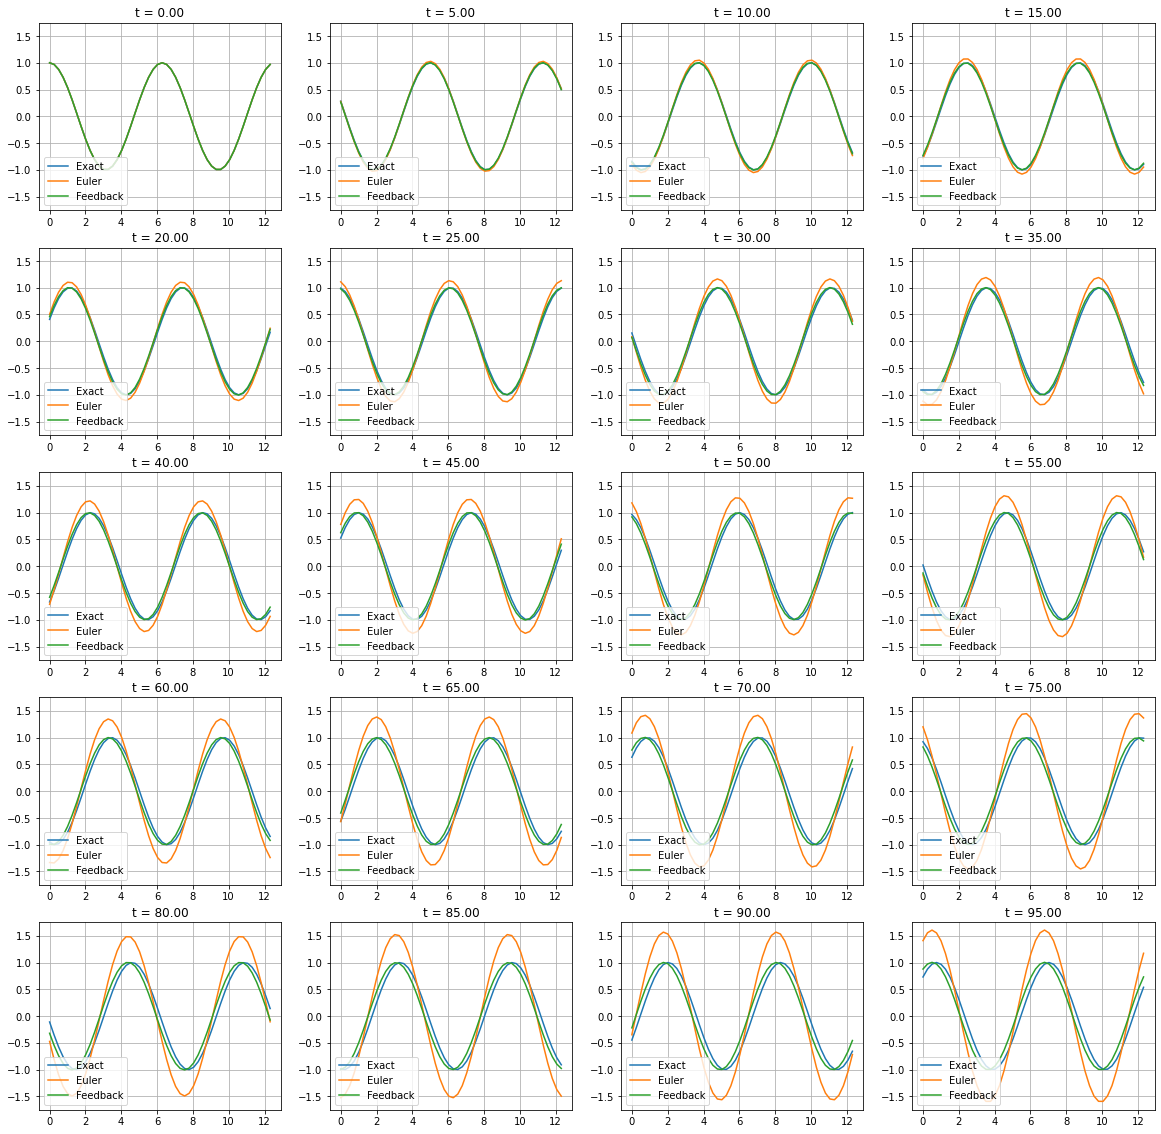

In [110]:
nrows = 5
ncols = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
stride = len(us) // nrows // ncols

for i, ax in enumerate(axes.flatten()):
    t = ts[stride*i]
    ax.grid()
    ax.plot(xs, np.cos(xs - t), label="Exact")
    ax.plot(xs, us_euler[stride*i], label="Euler")
    ax.plot(xs, us_feedback[stride*i], label="Feedback")
    ax.set_title(f"t = {t:0.2f}")
    ax.legend(loc="lower left")
    ax.set_ylim((-1.75, 1.75))

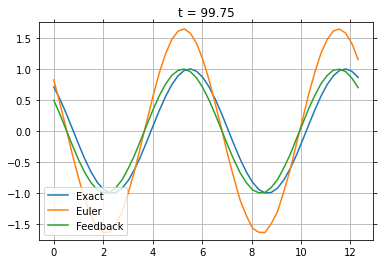

In [125]:
fig, ax = plt.subplots()
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.75, 1.75)

frameno = 0
for i, t in enumerate(ts):
    if i % 25 != 0:
        continue
    
    ax.cla()
    ax.grid()
    ax.plot(xs, np.cos(xs - t), label="Exact")
    ax.plot(xs, us_euler[i], label="Euler")
    ax.plot(xs, us_feedback[i], label="Feedback")
    ax.set_title(f"t = {t:0.2f}")
    ax.legend(loc="lower left")
    ax.set_ylim(-1.75, 1.75)
    
    plt.savefig(f"frame-{frameno:04}.png", dpi=300)
    frameno += 1
    